# Homework 9
## Ryan Kingery
## 11/8/2017



The following is a Jupyter Notebook implementation of the `a_new_hope.py` script at https://github.com/amueller/word_cloud. The goal is to generate a word cloud of the script of the original Star Wars movie *Star Wars: A New Hope*.  Because the creators of the script appear to be especially nerdy, the word cloud will be shaped like a stormtrooper's helmet. To begin we load in several packages to be used in generating the word cloud. We also create a function to handle some image processing details later on, and specify the filepath. Last, we create an image mask of the stormtrooper helmet to be used for the word cloud later on.

In [5]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

DIR = '/Users/ryankingery/desktop/'
mask = np.array(Image.open(DIR+"stormtrooper_mask.png"))

Next we perform some text processing on the movie script. Minor examples of processing include standardizing the case on various common words in the script, getting rid of possessive suffixes, and removing stopwords from the text.

In [6]:
text = open(DIR+'a_new_hope.txt').read()

# preprocessing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")


We now use the above text to generate a word cloud object and set up the plotting parameters to plot the word cloud. The word cloud is limited to the 1000 most frequently occuring words to make it readable. To contrast the difference between black and white and color we illustrate the word cloud in both forms. These word clouds are shown below for your enjoyment.

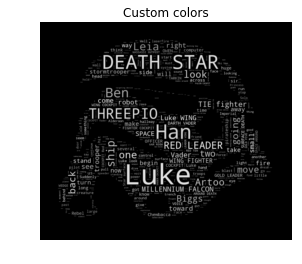

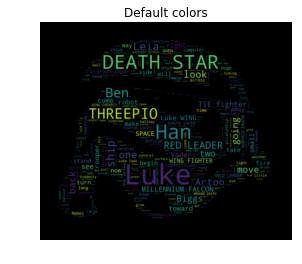

In [7]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)

default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

It's hard to get more nerdy than this folks. May the Force be with you, always.